# Get:
- MLD2015
- MLD2019
- X21°C Isotherm

In [5]:
# 1. read MLD forcings:
# where to get Fluoresence & HPLC data from?
Upwelling <- read.csv("Data/Upwelling_Final-Feb2018.csv",sep=';',dec=',')

In [6]:
Upwelling$Date <- as.Date(Upwelling$Date,format='%m.%d.%Y')

In [7]:
Upwelling$date = format(Upwelling$Date, "%Y-%m")

In [8]:
head(Upwelling$date)

[1] "1995-11" "1995-12" "1996-01" "1996-02" "1996-03" "1996-04"

# Calculate my own x25.8 isopycnal

In [9]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(scales)
require(oce)

Loading required package: ncdf4
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: tidyverse
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.3  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats

In [10]:
# open a NetCDF file
ctdat <- nc_open("Data/ctd.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [11]:
ctdat_df <- data.frame("Num" = 1:ctdat$dim$unlimited$len)
print('start')
for(i in 1:ctdat$nvars){
    #print(i)
    ctdat_df[paste(attributes(ctdat$var)$names[i])] <- ncvar_get(ctdat, attributes(ctdat$var)$names[i])
}
print('done reading')
head(ctdat_df)

[1] "start"
[1] "done reading"


Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,...,temp,sal,potemp,sigma_t,sigma_0,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla
1,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,,36.612,,,,,,,0.173,
2,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.522,36.612,27.522,23.764,23.764,3.964,,,0.176,
3,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.489,36.612,27.488,23.775,23.775,3.978,,,0.166,
4,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.465,36.614,27.464,23.782,23.782,3.984,,,0.164,
5,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.458,36.613,27.456,23.786,23.787,3.990,,,0.170,
6,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.454,36.613,27.452,23.787,23.787,3.992,,,0.175,


In [12]:
cat(names(ctdat_df))

Num cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date Latitude Longitude press depth temp sal potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD fluor_chla

In [13]:
ctdat_df$date <- as.Date(ctdat_df$Date)

ctdat_df$press <- as.numeric(ctdat_df$press)
ctdat_df$depth <- as.numeric(ctdat_df$depth)
ctdat_df$temp <- as.numeric(ctdat_df$temp)
ctdat_df$sal <- as.numeric(ctdat_df$sal)
ctdat_df$potemp <- as.numeric(ctdat_df$potemp) 
ctdat_df$sigma_t <- as.numeric(ctdat_df$sigma_t)
ctdat_df$sigma_0 <- as.numeric(ctdat_df$sigma_0)
ctdat_df$O2_ml_L <- as.numeric(ctdat_df$O2_ml_L)
ctdat_df$beam_cp <- as.numeric(ctdat_df$beam_cp)
ctdat_df$beam_att <- as.numeric(ctdat_df$beam_att)
ctdat_df$fluor_CTD <- as.numeric(ctdat_df$fluor_CTD)
ctdat_df$fluor_chla <- as.numeric(ctdat_df$fluor_chla)

In [14]:
ctdat_df[ctdat_df>10000000000]=NA

Warning message:
“Removed 265276 rows containing missing values (geom_point).”

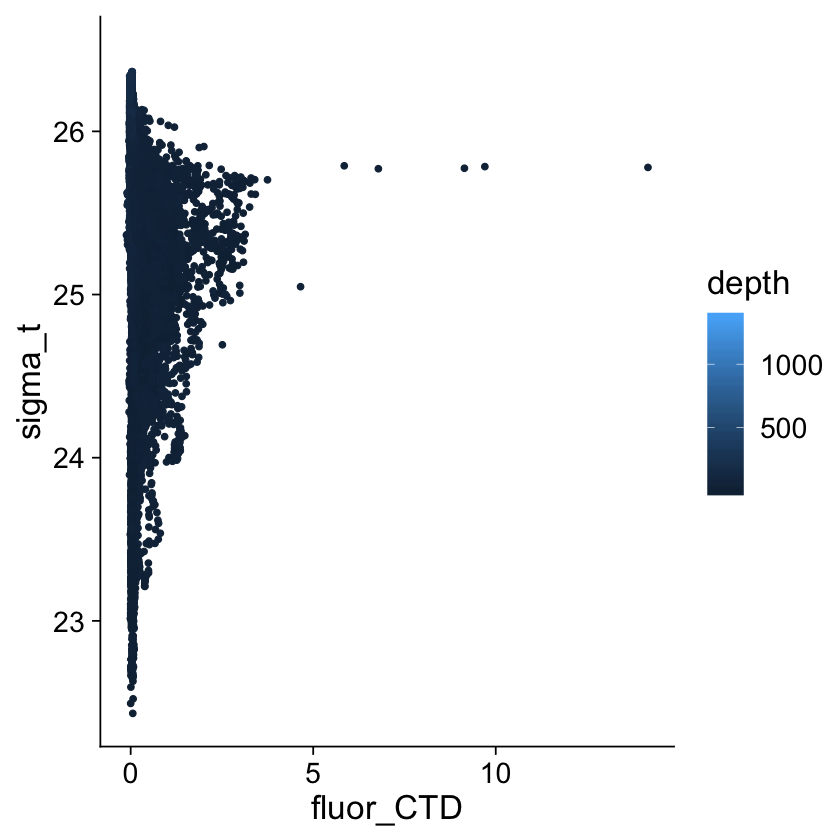

In [15]:
ggplot(data=ctdat_df, aes(x=fluor_CTD, y=sigma_t, col=depth)) + geom_point() +theme_cowplot(20) #+  scale_y_continuous(trans = "reverse") #+ ylim(100,0) #+ xlim(0,10)

In [16]:
CTDx258 <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= 25.8) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [17]:
head(CTDx258)

Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,...,potemp,sigma_t,sigma_0,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla,date,belowmld
66,1,NA,NA,1995,11,8,1995-11-08,10.500,-64.667,...,21.029,25.820,25.827,2.633,NA,NA,NA,NA,1995-11-08,TRUE
653,2,NA,NA,1995,12,14,1995-12-14,10.500,-64.667,...,23.962,25.806,25.093,NA,NA,NA,0.647,NA,1995-12-14,TRUE
1275,3,NA,NA,1996,1,13,1996-01-13,10.500,-64.667,...,21.257,25.807,25.812,2.265,NA,NA,0.045,NA,1996-01-13,TRUE
1848,4,NA,NA,1996,2,14,1996-02-14,10.492,-64.668,...,21.278,25.818,25.823,2.219,NA,NA,0.079,NA,1996-02-14,TRUE
2464,5,NA,NA,1996,3,13,1996-03-13,10.500,-64.667,...,21.323,25.807,25.809,2.653,NA,NA,0.098,NA,1996-03-13,TRUE
3773,6,NA,NA,1996,4,16,1996-04-16,10.500,-64.667,...,21.198,25.811,25.813,NA,NA,NA,NA,NA,1996-04-16,TRUE


In [18]:
options(repr.plot.width=16, repr.plot.height=10)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


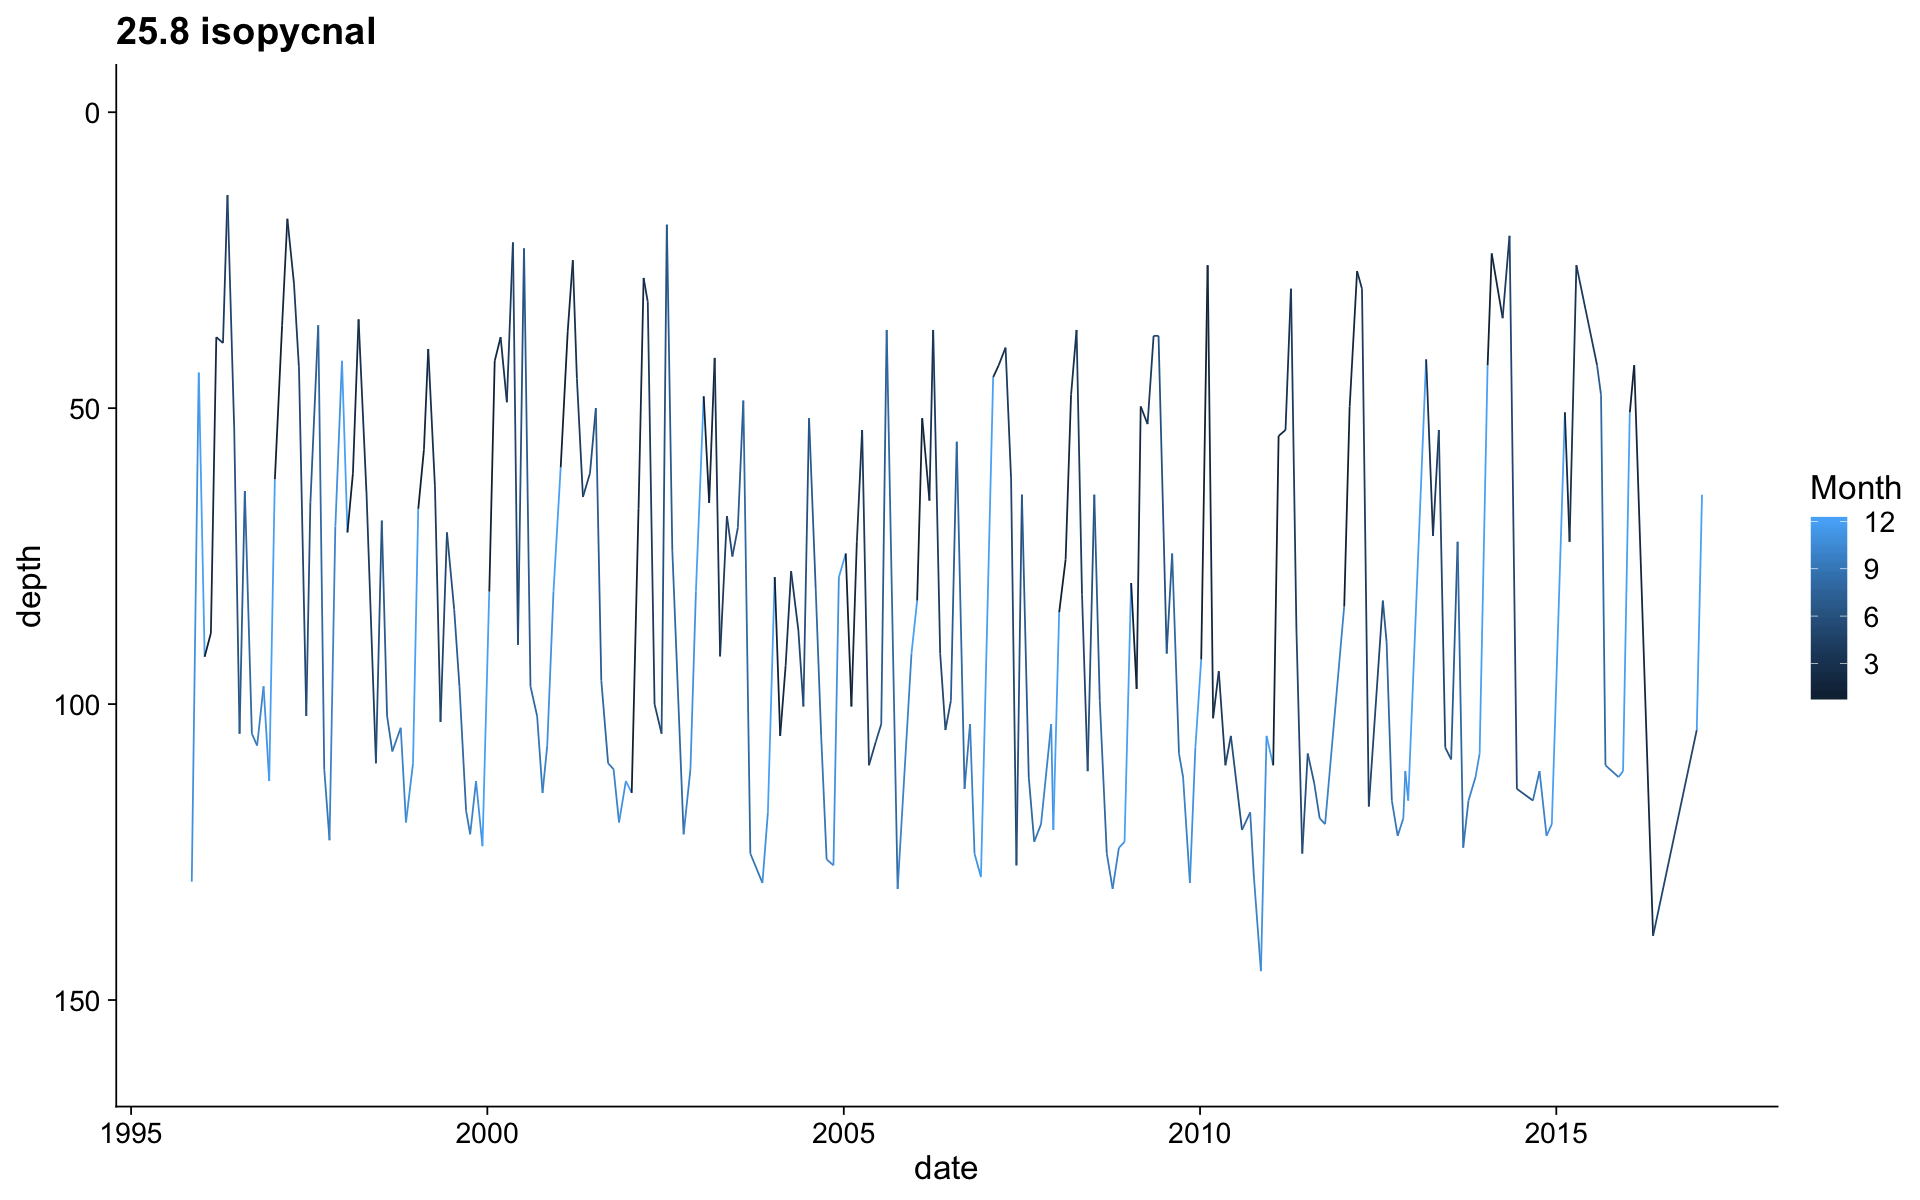

In [19]:
ggplot()+geom_line(data=CTDx258,aes(x=date,y=depth, col=Month)) + theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(160,0) + ggtitle('25.8 isopycnal')

In [20]:
#year vs month of the year, col = depth

In [21]:
mld_depth <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [22]:
head(mld_depth)

Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,...,potemp,sigma_t,sigma_0,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla,date,belowmld
13,1,NA,NA,1995,11,8,1995-11-08,10.500,-64.667,...,26.711,23.982,23.984,3.786,NA,NA,0.373,NA,1995-11-08,TRUE
640,2,NA,NA,1995,12,14,1995-12-14,10.500,-64.667,...,25.330,24.712,24.684,NA,NA,NA,0.051,NA,1995-12-14,TRUE
1234,3,NA,NA,1996,1,13,1996-01-13,10.500,-64.667,...,23.993,25.093,25.093,2.967,NA,NA,1.250,NA,1996-01-13,TRUE
1809,4,NA,NA,1996,2,14,1996-02-14,10.492,-64.668,...,23.607,25.247,25.248,3.149,NA,NA,1.370,NA,1996-02-14,TRUE
2436,5,NA,NA,1996,3,13,1996-03-13,10.500,-64.667,...,22.227,25.566,25.567,3.591,NA,NA,2.910,NA,1996-03-13,TRUE
3741,6,NA,NA,1996,4,16,1996-04-16,10.500,-64.667,...,22.685,25.489,25.490,NA,NA,NA,NA,NA,1996-04-16,TRUE


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


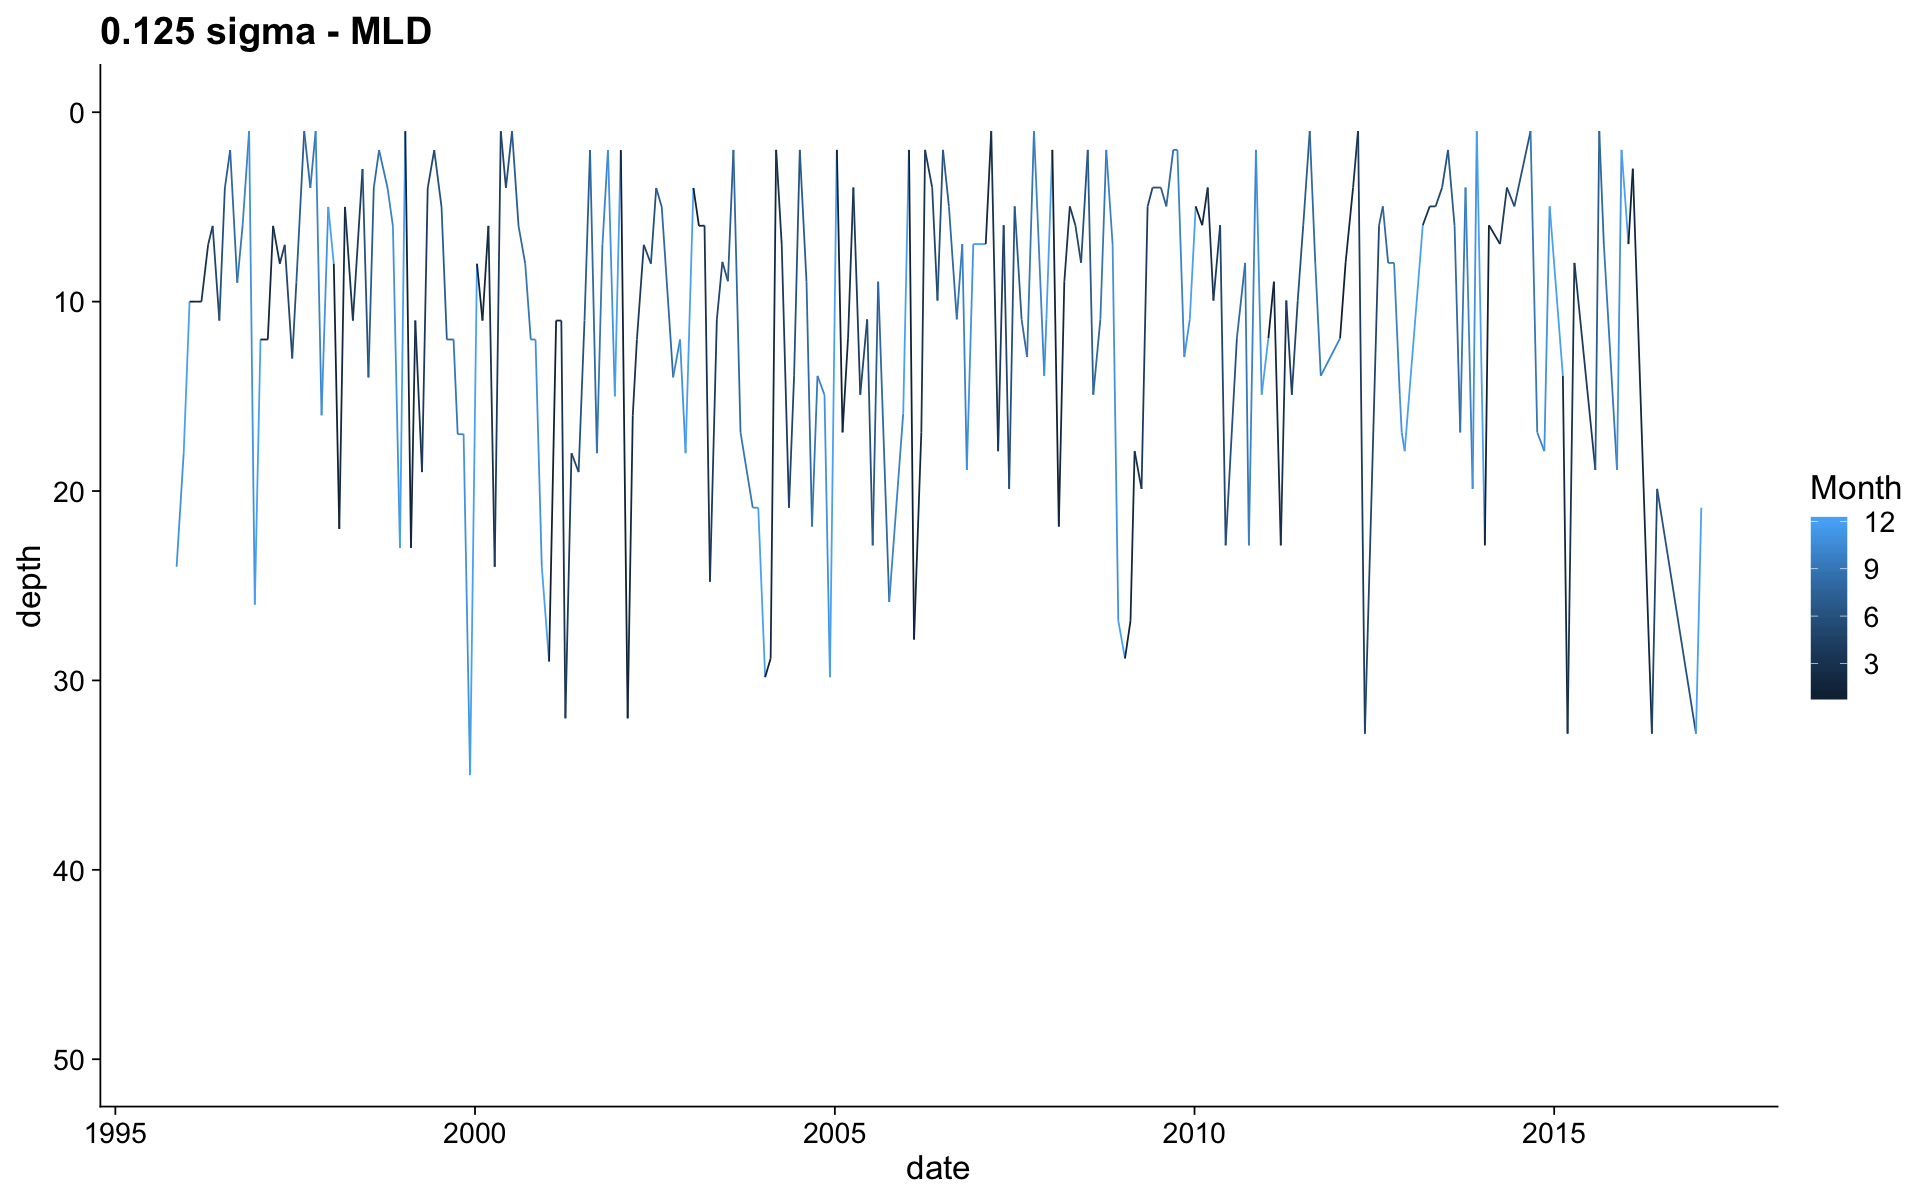

In [23]:
ggplot()+geom_line(data=mld_depth,aes(x=date,y=depth, col=Month)) + theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(50,0) + ggtitle('0.125 sigma - MLD')

# check regimes for isopycnal differences

In [40]:
CTDx258$value <- CTDx258$depth

In [41]:
#split data into two regimes:
CTDx258dfR1 <- CTDx258[!CTDx258$date>as.Date('2000-10-30') & !CTDx258$date<as.Date('1996-01-01'),]
CTDx258dfR2 <- CTDx258[!CTDx258$date<as.Date('2006-07-31') & !CTDx258$date>as.Date('2010-12-31'),]

In [98]:
# create day of year and month columsn for aggregate plotting
CTDx258dfR1$dyear <- as.Date(format(CTDx258dfR1$date, format="%m-%d"),format="%m-%d")
CTDx258dfR2$dyear <- as.Date(format(CTDx258dfR2$date, format="%m-%d"),format="%m-%d")
CTDx258dfR1$month <- format(CTDx258dfR1$date, format="%m")
CTDx258dfR2$month <- format(CTDx258dfR2$date, format="%m")

In [99]:
head(CTDx258dfR1)

Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,⋯,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla,date,belowmld,value,dyear,month
<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<lgl>,<dbl>,<date>,<chr>
1275,3,NA,NA,1996,1,13,1996-01-13,10.500,-64.667,⋯,2.265,NA,NA,0.045,NA,1996-01-13,TRUE,92,2020-01-13,01
1848,4,NA,NA,1996,2,14,1996-02-14,10.492,-64.668,⋯,2.219,NA,NA,0.079,NA,1996-02-14,TRUE,88,2020-02-14,02
2464,5,NA,NA,1996,3,13,1996-03-13,10.500,-64.667,⋯,2.653,NA,NA,0.098,NA,1996-03-13,TRUE,38,2020-03-13,03
3773,6,NA,NA,1996,4,16,1996-04-16,10.500,-64.667,⋯,NA,NA,NA,NA,NA,1996-04-16,TRUE,39,2020-04-16,04
5053,7,NA,NA,1996,5,9,1996-05-09,10.500,-64.667,⋯,NA,NA,NA,0.274,NA,1996-05-09,TRUE,14,2020-05-09,05
5755,8,NA,NA,1996,6,12,1996-06-12,10.500,-64.667,⋯,NA,NA,NA,0.146,NA,1996-06-12,TRUE,53,2020-06-12,06


In [131]:


CTDx258_1 <- 
ggplot() + geom_point(data=CTDx258dfR1,aes(x=dyear, y=value, col='Regime 1'))+  scale_y_continuous(trans = "reverse", limits = c(160,0), breaks=seq(160,0,-10))+
geom_point(data=CTDx258dfR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('25.8 isopycnal [m]') + xlab('Month of year') + labs(col='Regime') +theme_cowplot(15)

In [132]:
CTDx258_2 <- 
ggplot() + geom_boxplot(data=CTDx258dfR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(160,0), breaks=seq(160,0,-10))+
geom_boxplot(data=CTDx258dfR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('25.8 isopycnal [m]') + xlab('Month of year') + labs(col='Regime') +theme_cowplot(15)

In [133]:

CTDx258meanR1 <- mean(CTDx258dfR1$value, na.rm=T)
CTDx258meanR2 <- mean(CTDx258dfR2$value, na.rm=T)
CTDx258cvR1 <- sd(CTDx258dfR1$value, na.rm=T)/mean(CTDx258dfR1$value, na.rm=T)
CTDx258cvR2 <- sd(CTDx258dfR2$value, na.rm=T)/mean(CTDx258dfR2$value, na.rm=T)

CTDx258stats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", CTDx258meanR1, CTDx258cvR1, CTDx258meanR2, CTDx258cvR2)) +theme_cowplot(20)
#ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", CTDx258meanR1, CTDx258cvR1, CTDx258meanR2, CTDx258cvR2))

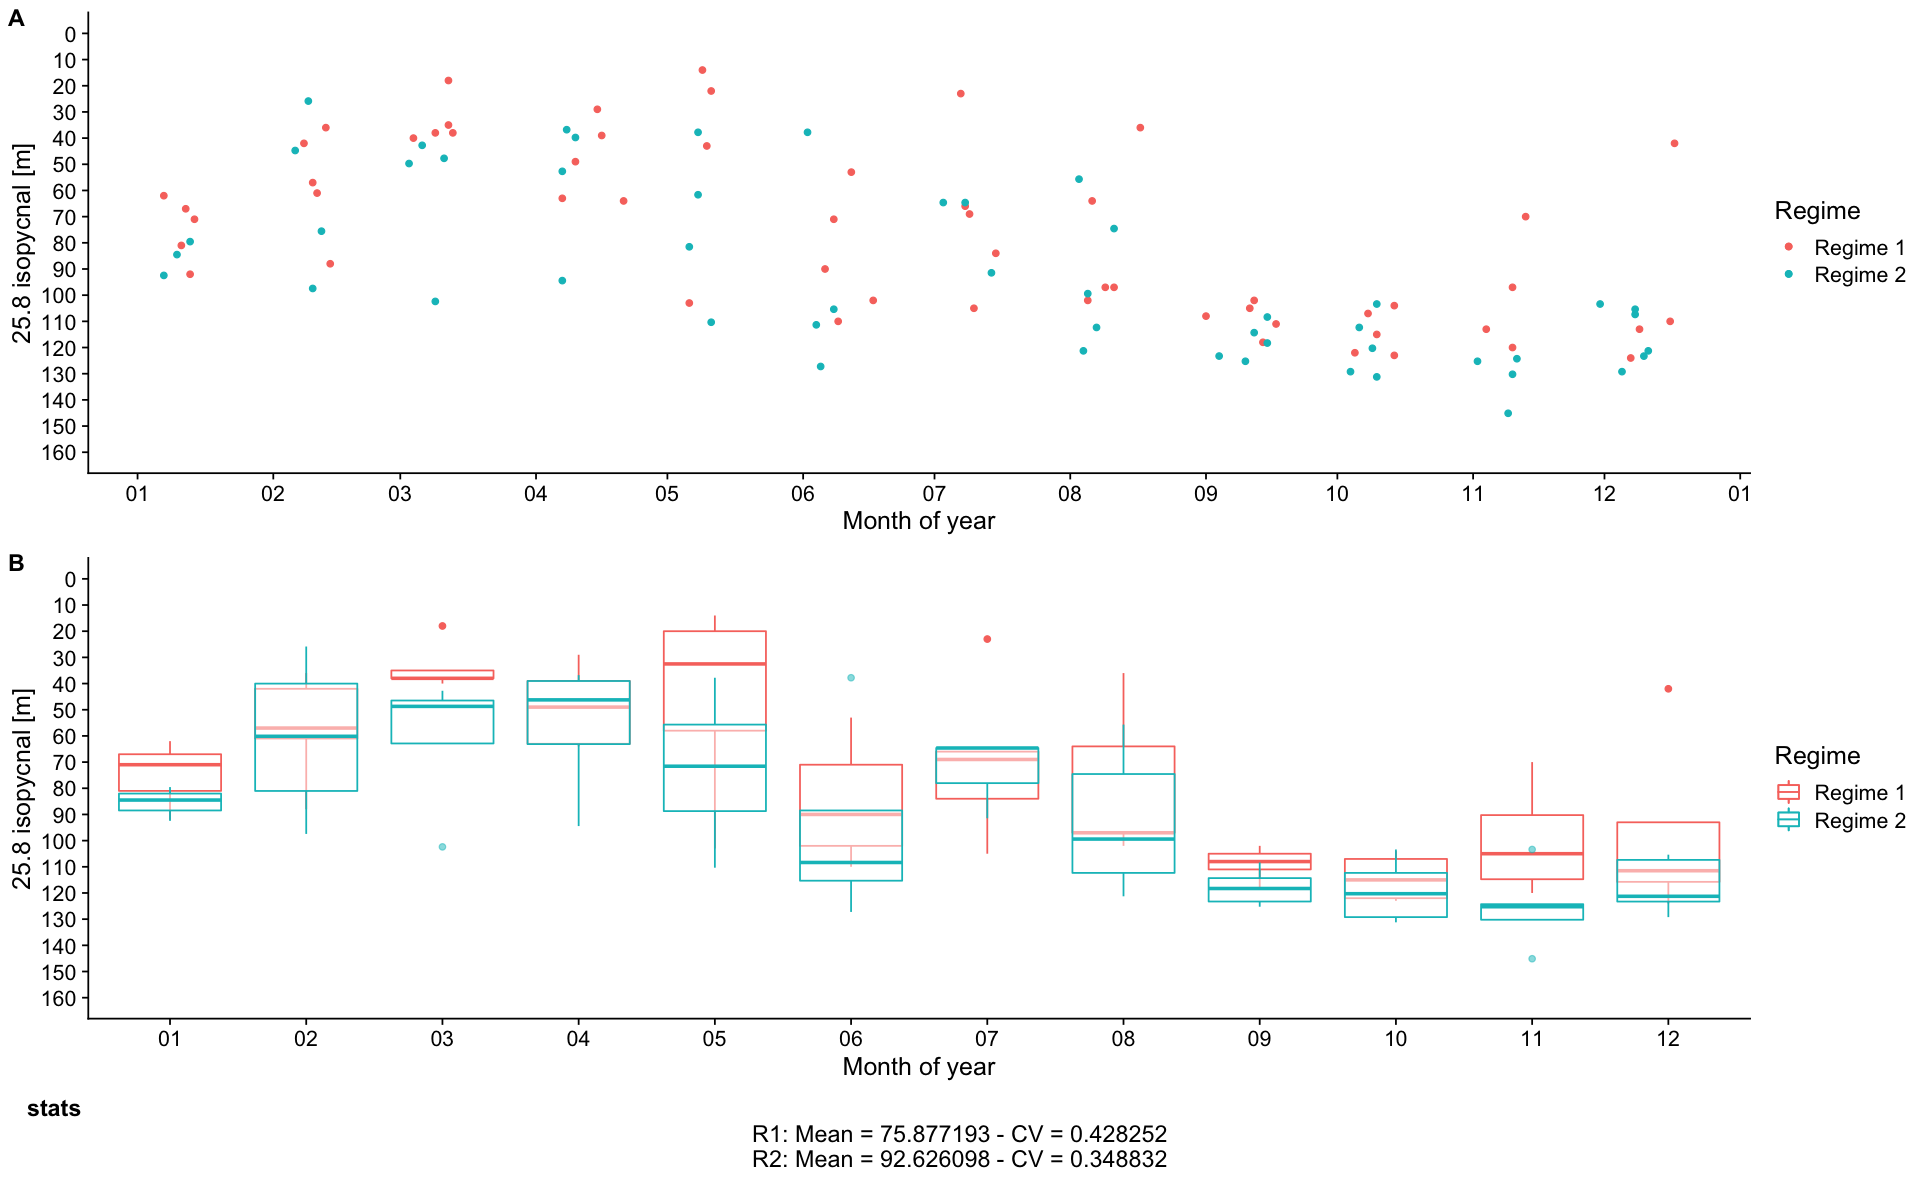

In [134]:
options(repr.plot.width=16, repr.plot.height=10)
plot_grid(CTDx258_1, CTDx258_2, CTDx258stats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [ ]:
# plot time series of salinity!



# COMPARE TO PINCKNEY

In [24]:
head(Upwelling)

Cruise,Month,date,Temp1.7m,Sigma.t.1.7m,PriPro.1.7m,Chl.1.7m,Depth.of.25.8.isopycnal..21degC.,Depth.of.25.6.isopycnal..22degC.,DateMLD.I,MLD.I,Date,MLD.II
1,11,1995-11,27.495,23.720,NA,0.084,130,118,,NA,1995-11-01,24.138
2,12,1995-12,25.395,24.590,1.385,0.135,114,94,,NA,1995-12-01,18.103
3,1,1996-01,24.250,25.023,14.024,1.385,102,62,Jan.96,6.000,1996-01-01,10.057
4,2,1996-02,23.815,25.149,9.785,0.822,94,66,Feb.96,6.034,1996-02-01,8.046
5,3,1996-03,22.747,25.423,15.386,3.005,48,24,Mar.96,7.040,1996-03-01,10.057
6,4,1996-04,22.747,25.419,4.900,3.405,48,26,Apr.96,4.023,1996-04-01,7.040


In [26]:
head(CTDx258)

Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,...,potemp,sigma_t,sigma_0,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla,date,belowmld
66,1,NA,NA,1995,11,8,1995-11-08,10.500,-64.667,...,21.029,25.820,25.827,2.633,NA,NA,NA,NA,1995-11-08,TRUE
653,2,NA,NA,1995,12,14,1995-12-14,10.500,-64.667,...,23.962,25.806,25.093,NA,NA,NA,0.647,NA,1995-12-14,TRUE
1275,3,NA,NA,1996,1,13,1996-01-13,10.500,-64.667,...,21.257,25.807,25.812,2.265,NA,NA,0.045,NA,1996-01-13,TRUE
1848,4,NA,NA,1996,2,14,1996-02-14,10.492,-64.668,...,21.278,25.818,25.823,2.219,NA,NA,0.079,NA,1996-02-14,TRUE
2464,5,NA,NA,1996,3,13,1996-03-13,10.500,-64.667,...,21.323,25.807,25.809,2.653,NA,NA,0.098,NA,1996-03-13,TRUE
3773,6,NA,NA,1996,4,16,1996-04-16,10.500,-64.667,...,21.198,25.811,25.813,NA,NA,NA,NA,NA,1996-04-16,TRUE


In [28]:
mean(CTDx258$depth)

[1] 83.63794

In [30]:
mean(Upwelling$Depth.of.25.8.isopycnal..21degC.,na.rm=T)

[1] 89.72368

In [34]:
#split data into two regimes:
UpwellingdfR1 <- Upwelling[!Upwelling$Date>as.Date('2000-10-30') & !Upwelling$Date<as.Date('1996-01-01'),]
UpwellingdfR2 <- Upwelling[!Upwelling$Date<as.Date('2006-07-31') & !Upwelling$Date>as.Date('2010-12-31'),]

In [36]:
mean(UpwellingdfR1$Depth.of.25.8.isopycnal..21degC.,na.rm=T)
mean(UpwellingdfR2$Depth.of.25.8.isopycnal..21degC.,na.rm=T)

[1] 83.87719

[1] 94.48

In [43]:
mean(CTDx258dfR1$depth)
mean(CTDx258dfR2$depth)

[1] 75.87719

[1] 92.6261

Warning message:
“Removed 1 rows containing missing values (geom_path).”

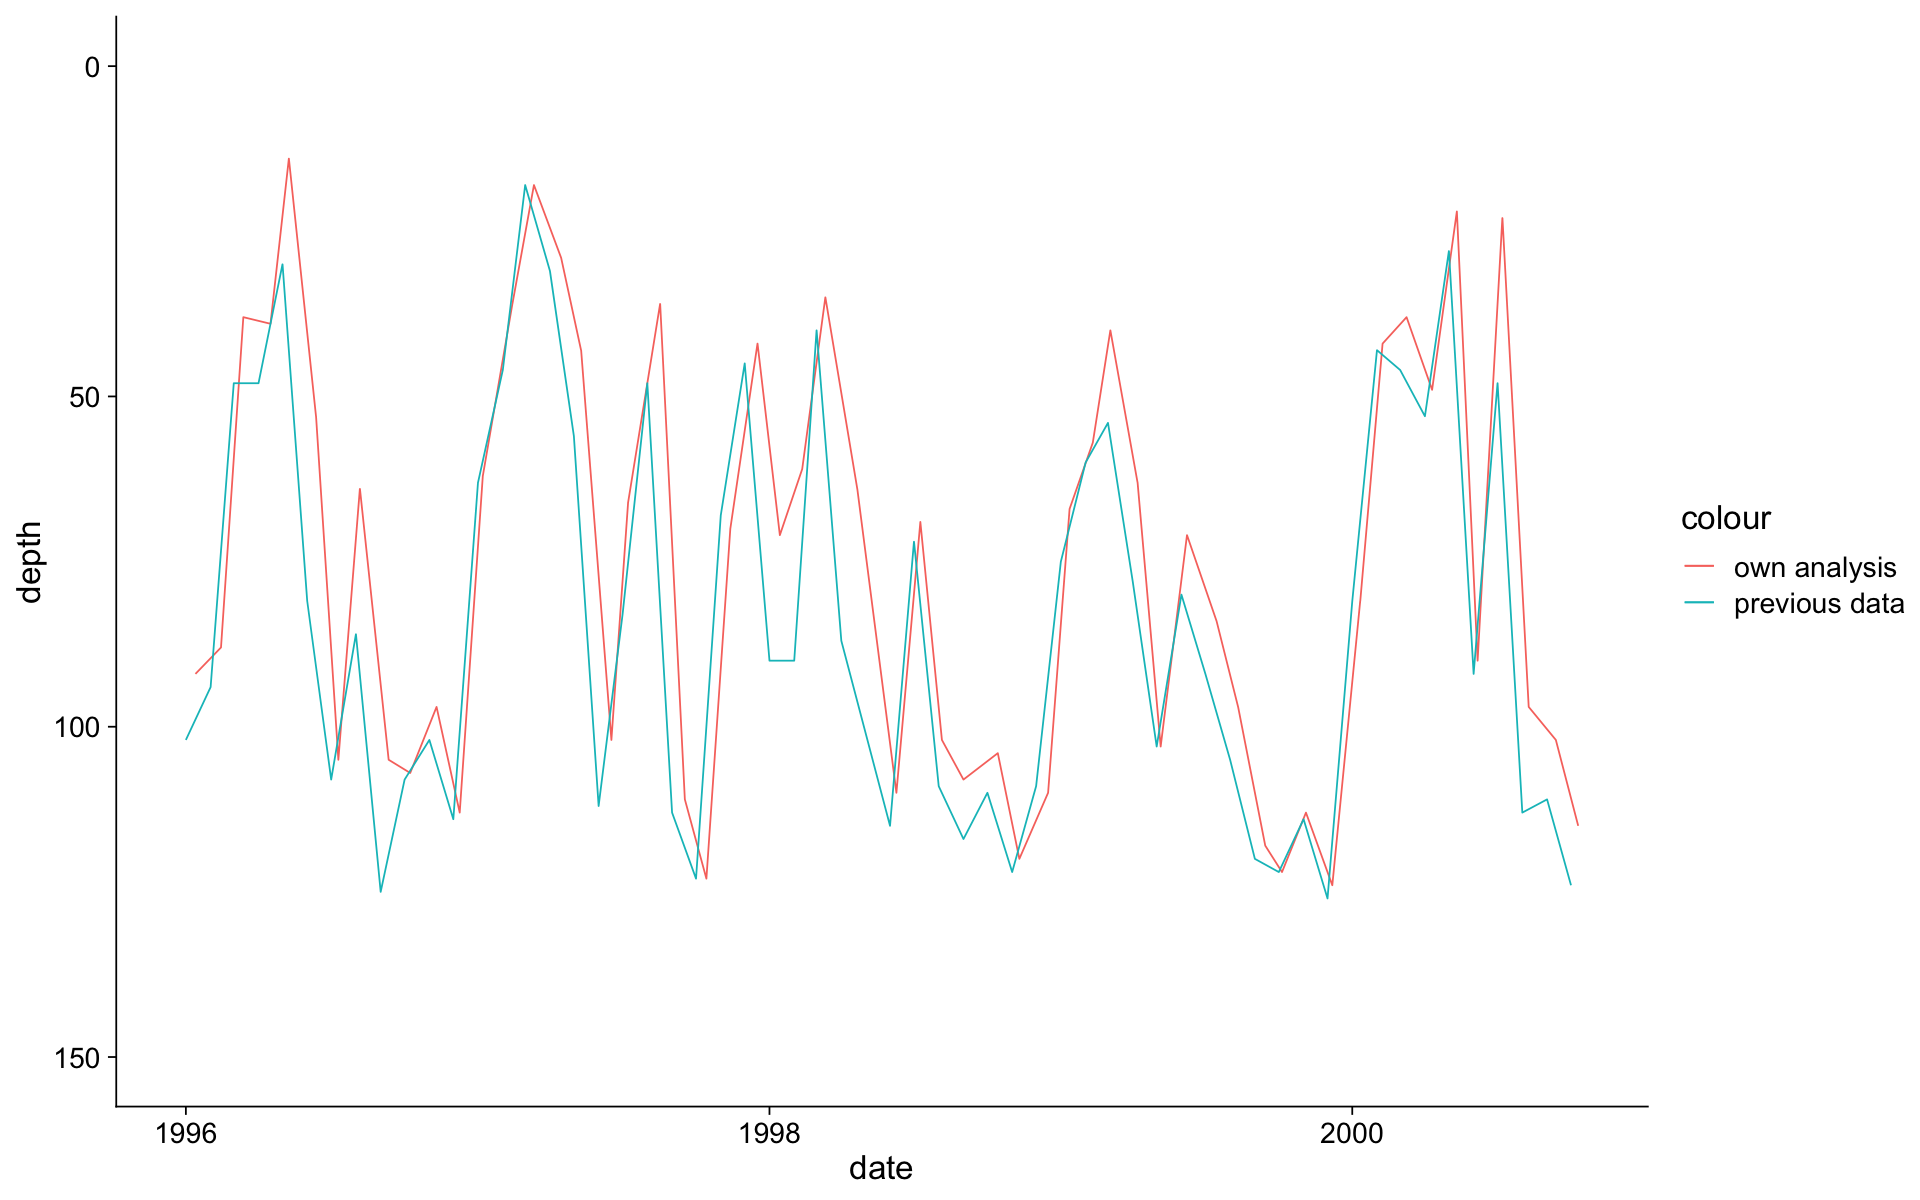

In [63]:
ggplot()+
geom_line(data=CTDx258dfR1, aes(y = depth, x=date,col='own analysis')) + 
geom_line(data=UpwellingdfR1, aes(y=Depth.of.25.8.isopycnal..21degC.,x=Date,col='previous data')) + 
scale_y_reverse(limits=c(150,0)) +theme_cowplot(20)